<img src='img_notebook/kpmgimg1.png' width = 300>

# Data Analytics KPMG TASK-2
**by: kintan Pitaloka Winasih**

**Their marketing team is looking to boost business by 
analysing their existing customer dataset to determine customer trends and behaviour.**

Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

# Data Understanding

### Data Preparation

In [559]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [560]:
custadress = pd.read_csv('csv2/custaddress.csv', delimiter=';', low_memory=False, encoding='latin-1')
transactions = pd.read_csv('csv2/transactions.csv', delimiter=';', low_memory=False, encoding='latin-1')
custdemographic = pd.read_csv('csv2/custdemographic.csv', delimiter=';', low_memory=False, encoding='latin-1')
newcustlist = pd.read_csv('csv2/newcustlist.csv', delimiter=';', low_memory=False, encoding='latin-1')

### Custaddress

In [561]:
custadress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [562]:
custadress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [563]:
custadress.shape

(3999, 6)

In [564]:
custadress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [565]:
custadress.describe(include=["object"])

,address,state,country
count,3999,3999,3999
unique,3996,5,1
top,3 Mariners Cove Terrace,NSW,Australia
freq,2,2054,3999


In [566]:
custadress.isnull().any()

customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool

In [567]:
custadress.duplicated().any()

False

**summary :**
   1. no duplicate values
   2. no null values
   3. 9999 rows, 6 colomns

### Transaction

In [568]:
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0


In [569]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [570]:
transactions.describe()

,transaction_id,product_id,customer_id,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,38199.776549
std,5773.647028,30.75359,1011.951046,2875.201110
min,1.000000,0.00000,1.000000,33259.000000
25%,5000.750000,18.00000,857.750000,35667.000000
50%,10000.500000,44.00000,1736.000000,38216.000000
75%,15000.250000,72.00000,2613.000000,40672.000000
max,20000.000000,100.00000,5034.000000,42710.000000


In [571]:
transactions.describe(include=["object"])

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
count,20000,19640,20000,19803,19803,19803,19803,20000,19803
unique,364,2,2,6,4,3,3,296,103
top,14/02/2017,True,Approved,Solex,Standard,medium,medium,"2091,47","$388,92"
freq,82,9829,19821,4253,14176,13826,12990,465,465


In [572]:
transactions.shape

(20000, 13)

In [573]:
transactions.duplicated().any()

False

In [574]:
transactions.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
dtype: bool

**misiing values at**
1. online order, 
2. brand, 
3. product_line, 
4. product_class, 
5. product_size
6. standard_cost
7. product_first_sold_date  

### online order

In [575]:
value_counts_oo = transactions['online_order'].value_counts()
percentages_oo = (value_counts_oo / len(transactions)) * 100

In [576]:
transactions.online_order.value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [577]:
percentages_oo

True     49.145
False    49.055
Name: online_order, dtype: float64

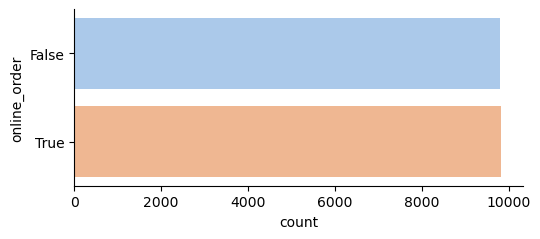

In [578]:
sns.catplot(y='online_order', kind='count', data=transactions, height=2.5, aspect=2.2, palette = 'pastel')

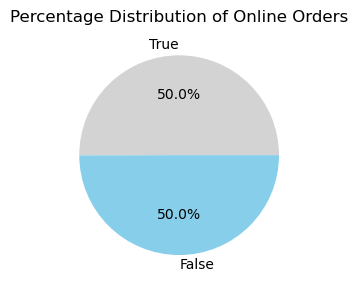

In [579]:
plt.figure(figsize=(3, 3))
plt.pie(percentages_oo, labels=value_counts_oo.index, autopct='%1.1f%%', colors=['lightgray', 'skyblue'])
plt.title('Percentage Distribution of Online Orders')
plt.tight_layout()
plt.show()

### order status

In [580]:
transactions.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [581]:
value_counts_os = transactions['order_status'].value_counts()
percentages_os = (value_counts_os / len(transactions)) * 100

In [582]:
transactions.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [583]:
percentages_os

Approved     99.105
Cancelled     0.895
Name: order_status, dtype: float64

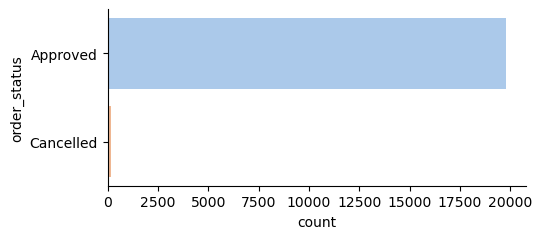

In [584]:
sns.catplot(y='order_status', kind='count', data=transactions, height=2.5, aspect=2.2, palette = 'pastel')

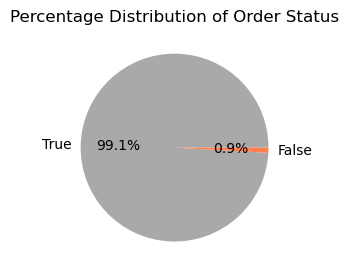

In [585]:
plt.figure(figsize=(3, 3))
plt.pie(percentages_os, labels=value_counts_oo.index, autopct='%1.1f%%', colors=['darkgray', 'coral'])
plt.title('Percentage Distribution of Order Status')
plt.tight_layout()
plt.show()

### product class

In [586]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [587]:
value_counts_pc = transactions['product_class'].value_counts()
percentages_pc = (value_counts_pc/ len(transactions)) * 100

In [588]:
transactions.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [589]:
percentages_pc

medium    69.130
high      15.065
low       14.820
Name: product_class, dtype: float64

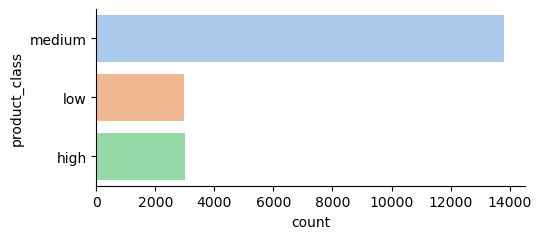

In [590]:
sns.catplot(y='product_class', kind='count', data=transactions, height=2.5, aspect=2.2, palette = 'pastel')

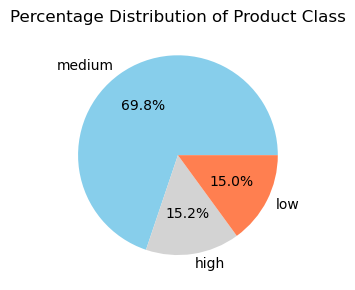

In [591]:
plt.figure(figsize=(3, 3))
plt.pie(percentages_pc, labels=value_counts_pc.index, autopct='%1.1f%%', colors=['skyblue', 'lightgray', 'coral'])
plt.title('Percentage Distribution of Product Class')
plt.tight_layout()
plt.show()

### product line

In [592]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [593]:
value_counts_pl = transactions['product_line'].value_counts()
percentages_pl = (value_counts_pl/ len(transactions)) * 100

In [594]:
transactions.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [595]:
percentages_pl

Standard    70.880
Road        19.850
Touring      6.170
Mountain     2.115
Name: product_line, dtype: float64

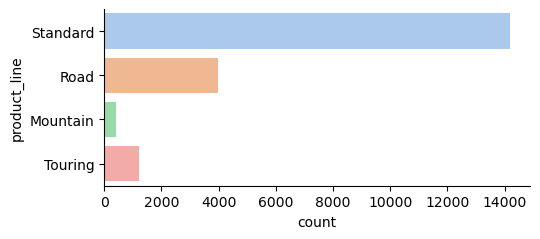

In [596]:
sns.catplot(y='product_line', kind='count', data=transactions, height=2.5, aspect=2.2, palette = 'pastel')

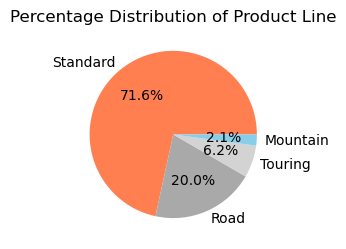

In [597]:
plt.figure(figsize=(3, 3))
plt.pie(percentages_pl, labels=value_counts_pl.index, autopct='%1.1f%%', colors=['coral','darkgray', 'lightgray', 'skyblue'])
plt.title('Percentage Distribution of Product Line')
plt.tight_layout()
plt.show()

### product size

In [598]:
transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [599]:
value_counts_ps = transactions['product_size'].value_counts()
percentages_ps = (value_counts_ps/ len(transactions)) * 100

In [600]:
percentages_ps

medium    64.950
large     19.880
small     14.185
Name: product_size, dtype: float64

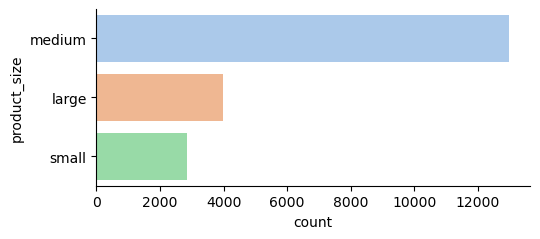

In [601]:
sns.catplot(y='product_size', kind='count', data=transactions, height=2.5, aspect=2.2, palette = 'pastel')

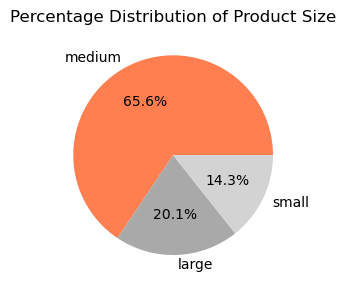

In [602]:
plt.figure(figsize=(3, 3))
plt.pie(percentages_ps, labels=value_counts_ps.index, autopct='%1.1f%%', colors=['coral','darkgray', 'lightgray'])
plt.title('Percentage Distribution of Product Size')
plt.tight_layout()
plt.show()

### standard cost

In [603]:
transactions['standard_cost'].head(10)

0     $53,62
1    $388,92
2    $248,82
3    $381,10
4    $709,48
5    $829,65
6     $45,26
7     $13,44
8    $380,74
9    $161,60
Name: standard_cost, dtype: object

In [604]:
transactions['standard_cost'].isnull().sum()

197

In [605]:
transactions.dropna(subset=['standard_cost'], how='all', inplace=True)

In [606]:
transactions['standard_cost'].notna().sum()

19803

In [607]:
# Remove dollar signs and commas, then convert 'standard_cost' to float
transactions['standard_cost'] = transactions['standard_cost'].str.replace('[$,]', '', regex=True).astype(float)

In [608]:
transactions['standard_cost'].head()

0     5362.0
1    38892.0
2    24882.0
3    38110.0
4    70948.0
Name: standard_cost, dtype: float64

<AxesSubplot:ylabel='Density'>

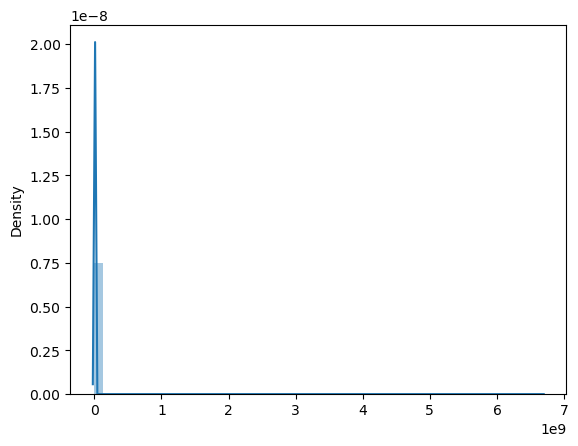

In [613]:
sns.distplot(x=transactions['standard_cost'])

In [149]:
transactions['product_first_sold_date'].value_counts()

33879.0    234
41064.0    229
37823.0    227
39880.0    222
38216.0    220
          ... 
41848.0    169
42404.0    168
41922.0    166
37659.0    163
34586.0    162
Name: product_first_sold_date, Length: 100, dtype: int64

In [ ]:
transactions.describe(include=["object"])

In [ ]:
transactions['brand'].value_counts()

**summary transaction:**
 1. any 20000 rows, 13 columns
 2. missing values at online order,brand, product_line,product_class, product_size, standard_cost, product_first_sold_date 
 3. top transaction 14 February 2017
 4. for order mostly is true, and approved
 5. top brand is Solex with product line standard
 5. top product class and product size is medium
 6. for top process is 2019,47
 7. for top standard cost = 388,92


## handle missing values

In [ ]:
transactions['online_order'].isnull().sum()

In [ ]:
sns.distplot(transactions['product_first_sold_date'])

In [ ]:
transactions['product_line'].isnull().sum()

In [ ]:
transactions['brand'].isnull().sum()

In [ ]:
transactions['product_line'].isnull().sum()

In [ ]:
transactions['product_class'].isnull().sum()

In [ ]:
transactions['product_size'].isnull().sum()

In [ ]:
transactions['standard_cost'].isnull().sum()

In [ ]:
transactions['product_first_sold_date'].isnull().sum()

In [ ]:
custdemographic.head()

In [ ]:
newcustlist.head()

In [ ]:
custadress.info()